In [2]:
pip install pandas seaborn matplotlib scipy

  Using cached matplotlib-3.7.5-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.7 kB)
  Using cached contourpy-1.1.1-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp38-cp38-macosx_10_9_universal2.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp38-cp38-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.7.5-cp38-cp38-macosx_11_0_arm64.whl (7.3 MB)
Using cached contourpy-1.1.1-cp38-cp38-macosx_11_0_arm64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp38-cp38-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.7-cp38-cp38-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-10.4.0-cp38-cp38-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 

Chargement des données...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2760127318.py:77: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Configuration', y='Accuracy (%)', hue='Dataset', data=df,



✅ Graphique sauvegardé sous : resultats_comparatifs_boxplot.png


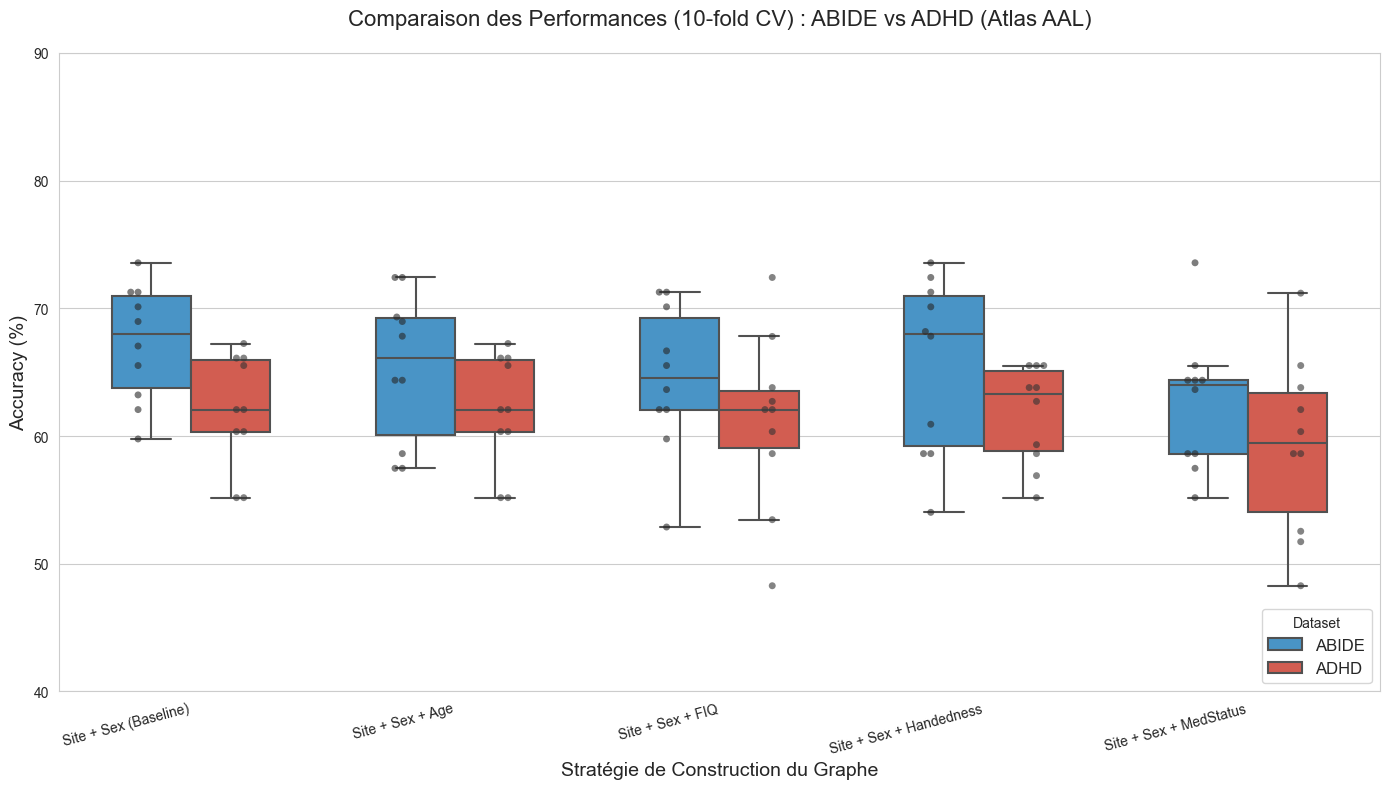

In [3]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. Configuration des fichiers ---
# Dictionnaire associant un nom lisible au fichier correspondant
files_map = {
    # ABIDE (AAL)
    ('ABIDE', 'Site + Sex (Baseline)'): 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + Age'):      'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + FIQ'):      'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + Handedness'): 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + MedStatus'):  'ABIDE_classification_ABIDE_AAL_MedStatus_SEX_SITE.mat',

    # ADHD (AAL)
    ('ADHD', 'Site + Sex (Baseline)'):  'ADHD_classification_ADHD_AAL_Site_Sex.mat',
    ('ADHD', 'Site + Sex + Age'):       'ADHD_classification_ADHD_AAL_Age_Site_Sex.mat',
    ('ADHD', 'Site + Sex + FIQ'):       'ADHD_classification_ADHD_AAL_FIQ_Site_Sex.mat',
    ('ADHD', 'Site + Sex + Handedness'): 'ADHD_classification_ADHD_AAL_Handedness_Site_Sex.mat',
    ('ADHD', 'Site + Sex + MedStatus'):  'ADHD_classification_ADHD_AAL_MedStatus_Site_Sex.mat',
}

# --- 2. Extraction des Données ---
data = []

print("Chargement des données...")
for (dataset, config), filename in files_map.items():
    if not os.path.exists(filename):
        print(f"⚠️ Fichier introuvable : {filename} (Ignoré)")
        continue
        
    try:
        mat = sio.loadmat(filename)
        
        # Récupération des counts corrects ('acc') et de la taille des folds ('folds')
        # flatten() sert à passer de [[1, 2...]] à [1, 2...]
        acc_counts = mat['acc'].flatten()
        fold_sizes = mat['folds'].flatten()
        
        # Calcul du pourcentage d'accuracy pour chaque fold
        # (Nombre correct / Taille du fold) * 100
        accuracies = (acc_counts / fold_sizes) * 100
        
        # Ajout dans la liste pour le DataFrame
        for acc in accuracies:
            data.append({
                'Dataset': dataset,
                'Configuration': config,
                'Accuracy (%)': acc
            })
            
    except Exception as e:
        print(f"❌ Erreur lecture {filename}: {e}")

# Création du DataFrame Pandas
df = pd.DataFrame(data)

# --- 3. Création du Graphique ---
# Configuration du style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Palette de couleurs (Bleu pour ABIDE, Rouge pour ADHD)
palette = {'ABIDE': '#3498db', 'ADHD': '#e74c3c'}

# Création du Boxplot
# x = Configuration (l'axe du bas)
# y = Accuracy (l'axe vertical)
# hue = Dataset (pour séparer ABIDE et ADHD par couleur)
ax = sns.boxplot(x='Configuration', y='Accuracy (%)', hue='Dataset', data=df, 
                 palette=palette, width=0.6, linewidth=1.5, fliersize=0)

# Ajout des points individuels (Swarmplot) pour voir la dispersion des 10 folds
sns.swarmplot(x='Configuration', y='Accuracy (%)', hue='Dataset', data=df, 
              dodge=True, size=5, color=".2", alpha=0.6)

# --- 4. Mise en forme ---
plt.title('Comparaison des Performances (10-fold CV) : ABIDE vs ADHD (Atlas AAL)', fontsize=16, pad=20)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Stratégie de Construction du Graphe', fontsize=14)
plt.xticks(rotation=15, ha='right') # Rotation des étiquettes pour lisibilité
plt.ylim(40, 90) # Ajustez selon vos résultats (ex: 40 à 90%)

# Légende propre
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='Dataset', fontsize=12, loc='lower right')

# Affichage des moyennes au-dessus des boîtes (Optionnel mais utile)
means = df.groupby(['Dataset', 'Configuration'])['Accuracy (%)'].mean().reset_index()
# (Code d'affichage des moyennes omis pour clarté visuelle, les boîtes suffisent souvent)

plt.tight_layout()

# Sauvegarde
output_file = 'resultats_comparatifs_boxplot.png'
plt.savefig(output_file, dpi=300)
print(f"\n✅ Graphique sauvegardé sous : {output_file}")

plt.show()

Chargement des données...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/3485418880.py:85: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df,



✅ Graphique sauvegardé sous : resultats_comparatifs_boxplot_horizontal.png


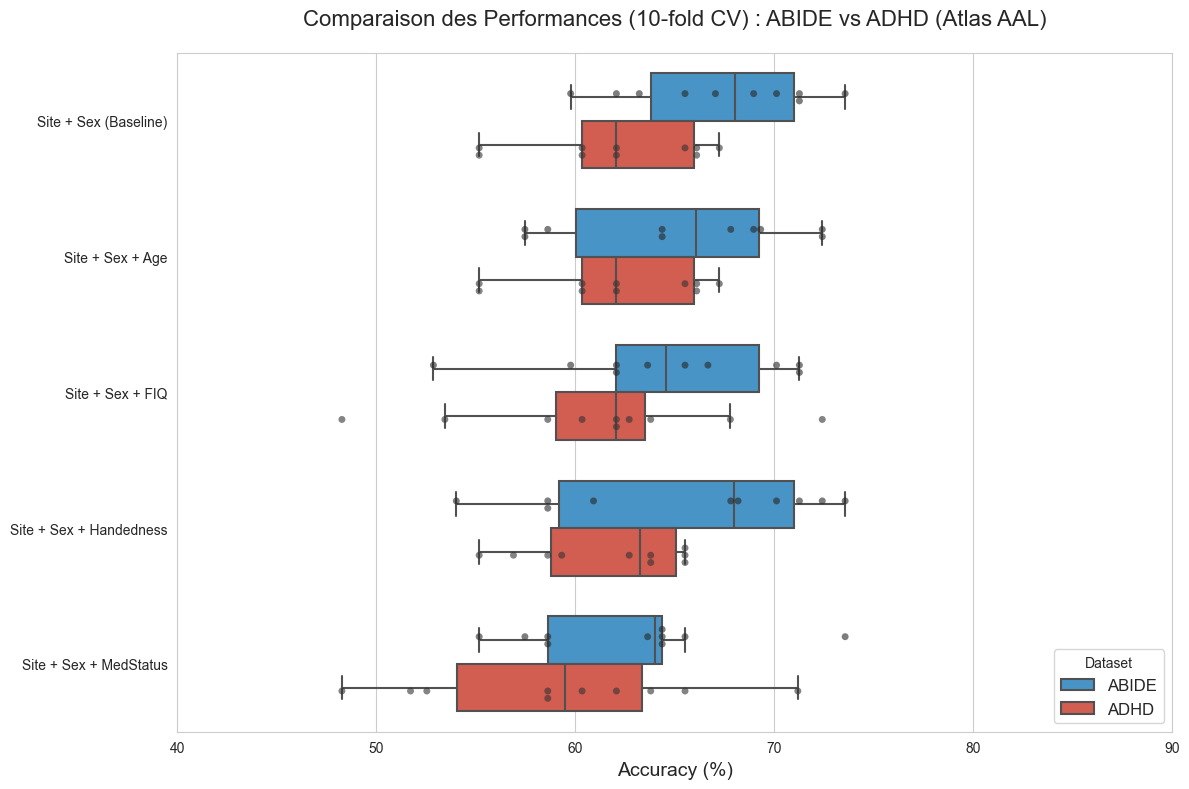

In [4]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. Configuration des fichiers ---
# Dictionnaire associant un nom lisible au fichier correspondant
files_map = {
    # ABIDE (AAL)
    ('ABIDE', 'Site + Sex (Baseline)'): 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + Age'):      'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + FIQ'):      'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + Handedness'): 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + MedStatus'):  'ABIDE_classification_ABIDE_AAL_MedStatus_SEX_SITE.mat',

    # ADHD (AAL)
    ('ADHD', 'Site + Sex (Baseline)'):  'ADHD_classification_ADHD_AAL_Site_Sex.mat',
    ('ADHD', 'Site + Sex + Age'):       'ADHD_classification_ADHD_AAL_Age_Site_Sex.mat',
    ('ADHD', 'Site + Sex + FIQ'):       'ADHD_classification_ADHD_AAL_FIQ_Site_Sex.mat',
    ('ADHD', 'Site + Sex + Handedness'): 'ADHD_classification_ADHD_AAL_Handedness_Site_Sex.mat',
    ('ADHD', 'Site + Sex + MedStatus'):  'ADHD_classification_ADHD_AAL_MedStatus_Site_Sex.mat',
}

# --- 2. Extraction des Données ---
data = []

print("Chargement des données...")
for (dataset, config), filename in files_map.items():
    if not os.path.exists(filename):
        print(f"⚠️ Fichier introuvable : {filename} (Ignoré)")
        continue
        
    try:
        mat = sio.loadmat(filename)
        
        # Récupération des counts corrects ('acc') et de la taille des folds ('folds')
        if 'acc' in mat and 'folds' in mat:
            acc_counts = mat['acc'].flatten()
            fold_sizes = mat['folds'].flatten()
            
            # Calcul du pourcentage d'accuracy pour chaque fold
            accuracies = (acc_counts / fold_sizes) * 100
            
            # Ajout dans la liste pour le DataFrame
            for acc in accuracies:
                data.append({
                    'Dataset': dataset,
                    'Configuration': config,
                    'Accuracy (%)': acc
                })
        else:
            print(f"⚠️ Clés manquantes dans {filename}")
            
    except Exception as e:
        print(f"❌ Erreur lecture {filename}: {e}")

# Création du DataFrame Pandas
df = pd.DataFrame(data)

# --- 3. Création du Graphique Horizontal ---
# Configuration du style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8)) # Taille ajustée pour l'horizontale

# Palette de couleurs (Bleu pour ABIDE, Rouge pour ADHD)
palette = {'ABIDE': '#3498db', 'ADHD': '#e74c3c'}

# Ordre d'affichage des configurations (de haut en bas)
order = [
    'Site + Sex (Baseline)', 
    'Site + Sex + Age', 
    'Site + Sex + FIQ', 
    'Site + Sex + Handedness', 
    'Site + Sex + MedStatus'
]

# Création du Boxplot Horizontal
# Note : on met 'Accuracy' sur X et 'Configuration' sur Y
ax = sns.boxplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df, 
                 order=order, palette=palette, width=0.7, linewidth=1.5, fliersize=0)

# Ajout des points individuels (Swarmplot) - attention à 'orient="h"'
sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df, 
              order=order, dodge=True, size=5, color=".2", alpha=0.6, orient="h")

# --- 4. Mise en forme ---
plt.title('Comparaison des Performances (10-fold CV) : ABIDE vs ADHD (Atlas AAL)', fontsize=16, pad=20)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.ylabel('', fontsize=14) # Pas besoin de label Y, les catégories suffisent
plt.xlim(40, 90) # Ajustez selon vos besoins

# Légende propre (on ne garde que les 2 premiers éléments pour éviter les doublons du swarmplot)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='Dataset', fontsize=12, loc='lower right')

plt.tight_layout()

# Sauvegarde
output_file = 'resultats_comparatifs_boxplot_horizontal.png'
plt.savefig(output_file, dpi=300)
print(f"\n✅ Graphique sauvegardé sous : {output_file}")

plt.show()